# Correlation Analysis & Time Series Analysis
## Topics
- Correlation Analysis
- Time Series Analysis
- Univariate 
- Bivariate 
- Multivariate 

## Requirements

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Loading

In [24]:
file_path = "KosteckiDillon.csv"  
data = pd.read_csv(file_path)

print("Dataset Preview:")
print(data.head())

Dataset Preview:
   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female


## Correlation Analysis

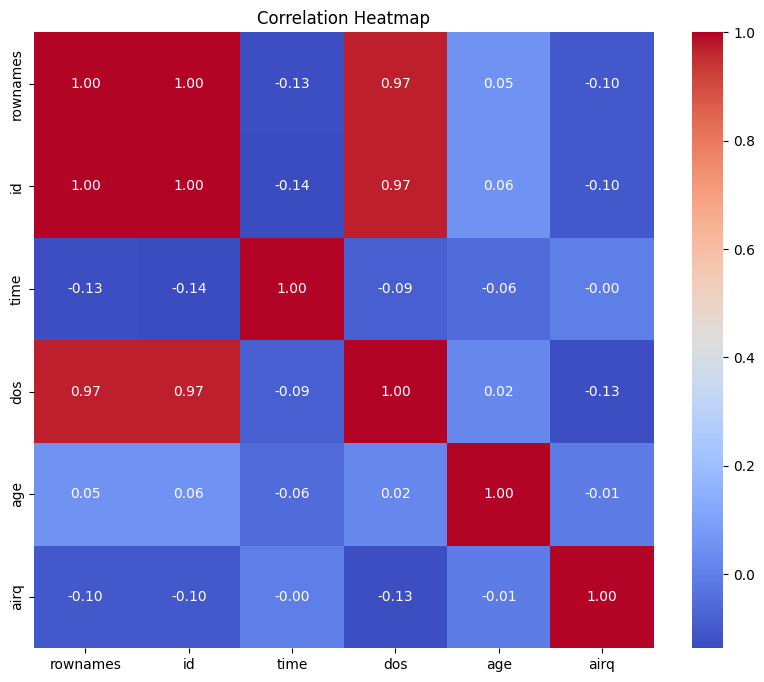

In [25]:
# Numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Time Series Analysis

In [26]:
start_date = "2000-01-01"  # Assumed start date for the study period of the dataset
data['date'] = pd.to_datetime(data['dos'], unit='D', origin=start_date)

data.set_index('date', inplace=True)

print(data.head())

            rownames  id  time  dos hatype  age  airq  medication headache  \
date                                                                         
2002-01-23         1   1   -11  753   Aura   30   9.0  continuing      yes   
2002-01-24         2   1   -10  754   Aura   30   7.0  continuing      yes   
2002-01-25         3   1    -9  755   Aura   30  10.0  continuing      yes   
2002-01-26         4   1    -8  756   Aura   30  13.0  continuing      yes   
2002-01-27         5   1    -7  757   Aura   30  18.0  continuing      yes   

               sex  
date                
2002-01-23  female  
2002-01-24  female  
2002-01-25  female  
2002-01-26  female  
2002-01-27  female  


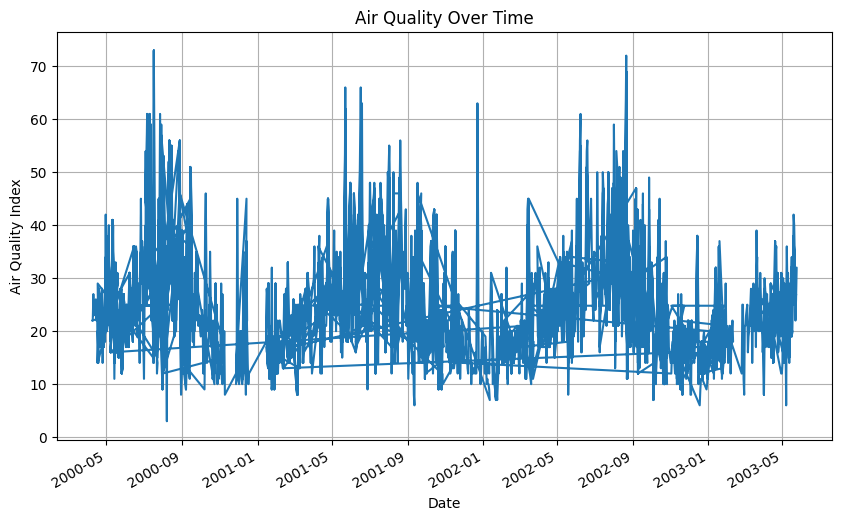

In [27]:
# Univariate Analysis of Air Quality Over Time
plt.figure(figsize=(10, 6))
data['airq'].plot(title='Air Quality Over Time', ylabel='Air Quality Index', xlabel='Date')
plt.grid()
plt.show()

C:\Users\aathe\AppData\Local\Temp\ipykernel_14616\1687106657.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=data.index, y='airq', hue='medication', ci=None)


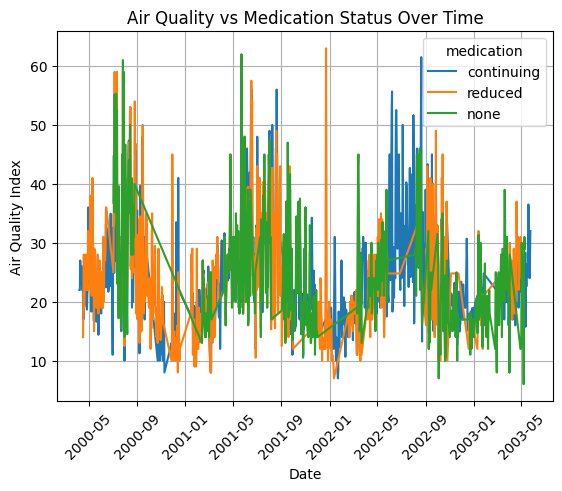

In [28]:
# Bivariate Analysis: Air Quality vs Medication Status Over Time
sns.lineplot(data=data, x=data.index, y='airq', hue='medication', ci=None)
plt.title('Air Quality vs Medication Status Over Time')
plt.ylabel('Air Quality Index')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()
plt.show()

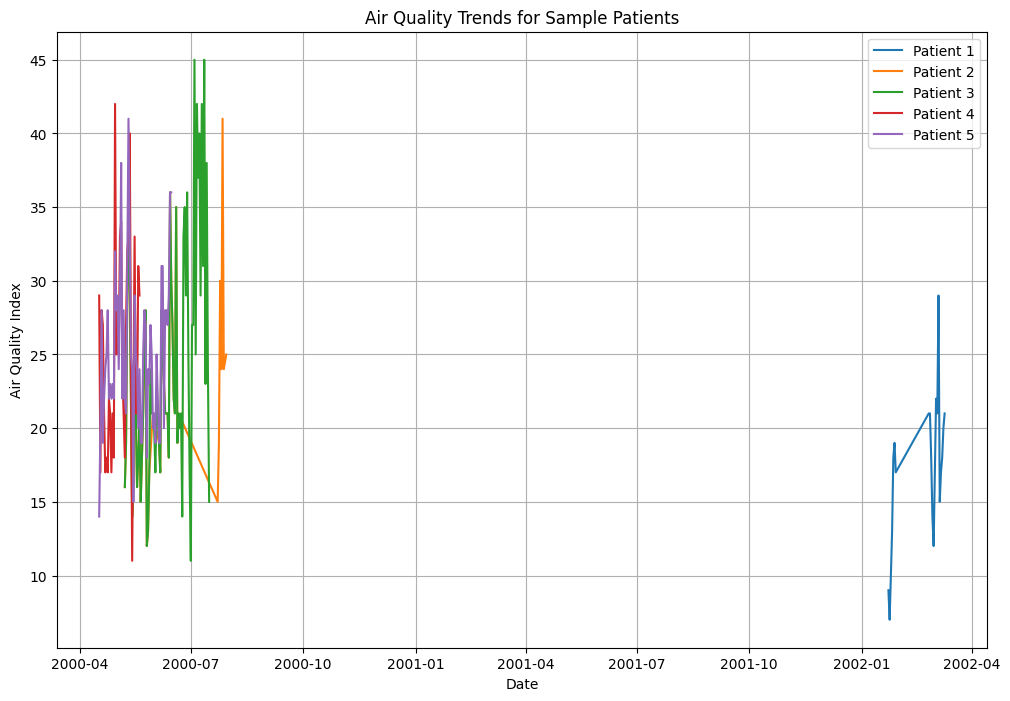

In [29]:
# Grouping by Patient ID
patients = data['id'].unique()
plt.figure(figsize=(12, 8))
for patient in patients[:5]:  # Visualize trends for first 5 patients
    patient_data = data[data['id'] == patient]
    plt.plot(patient_data.index, patient_data['airq'], label=f'Patient {patient}')
plt.title('Air Quality Trends for Sample Patients')
plt.ylabel('Air Quality Index')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

C:\Users\aathe\AppData\Local\Temp\ipykernel_14616\331471258.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = numeric_data.resample('M').mean()


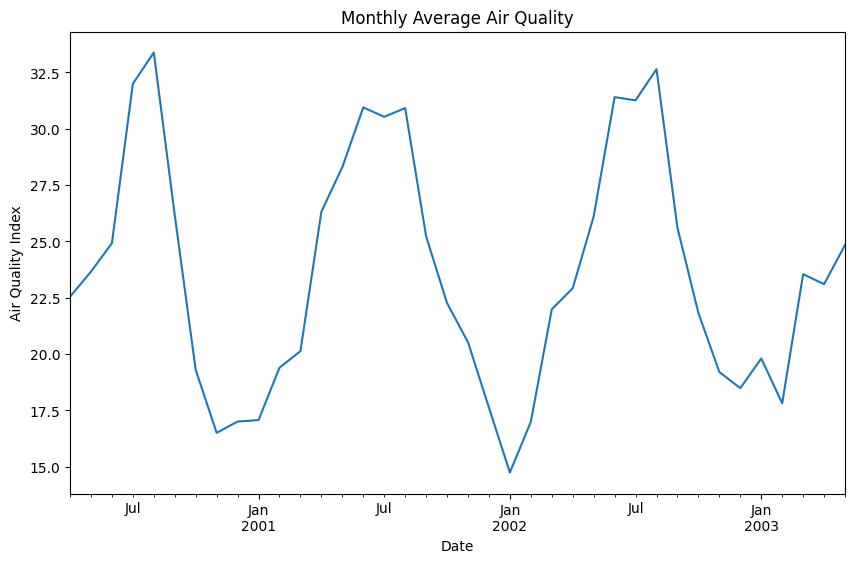

In [30]:
# Resampling for Monthly Analysis
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
monthly_data = numeric_data.resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_data['airq'].plot(title='Monthly Average Air Quality', ylabel='Air Quality Index', xlabel='Date')
plt.show()

C:\Users\aathe\AppData\Local\Temp\ipykernel_14616\4223199741.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=data.index, y='headache', hue='hatype', ci=None)


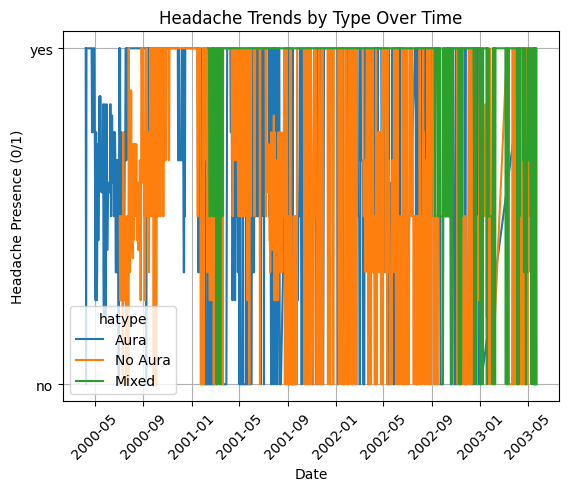

In [31]:
# Exploring Time-Based Patterns for Headache Presence
sns.lineplot(data=data, x=data.index, y='headache', hue='hatype', ci=None)
plt.title('Headache Trends by Type Over Time')
plt.ylabel('Headache Presence (0/1)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Univariate Analisis

In [32]:
# Summary statistics
print(data.describe())

          rownames           id         time          dos          age  \
count  4152.000000  4152.000000  4152.000000  4152.000000  4152.000000   
mean   2076.500000    66.386802    15.455684   646.705925    42.363921   
std    1198.723488    39.121812    21.737211   335.770123    11.201244   
min       1.000000     1.000000   -29.000000    98.000000    18.000000   
25%    1038.750000    33.000000     3.000000   384.000000    33.000000   
50%    2076.500000    67.000000    12.000000   623.000000    44.000000   
75%    3114.250000   100.000000    24.000000   950.000000    50.000000   
max    4152.000000   133.000000    99.000000  1239.000000    66.000000   

              airq  
count  4152.000000  
mean     24.826012  
std       9.514274  
min       3.000000  
25%      18.000000  
50%      24.000000  
75%      29.000000  
max      73.000000  


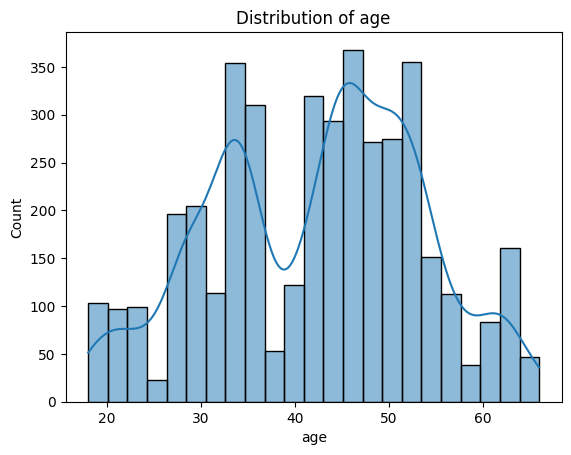

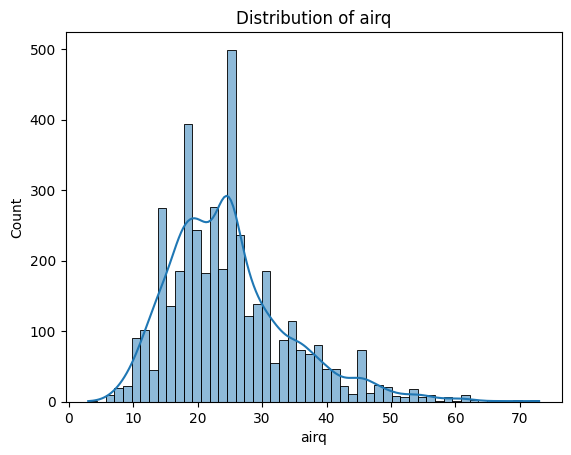

In [33]:
# Distribution of numerical variables
num_cols = ['age', 'airq']
for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

hatype
No Aura    1985
Aura       1710
Mixed       457
Name: count, dtype: int64


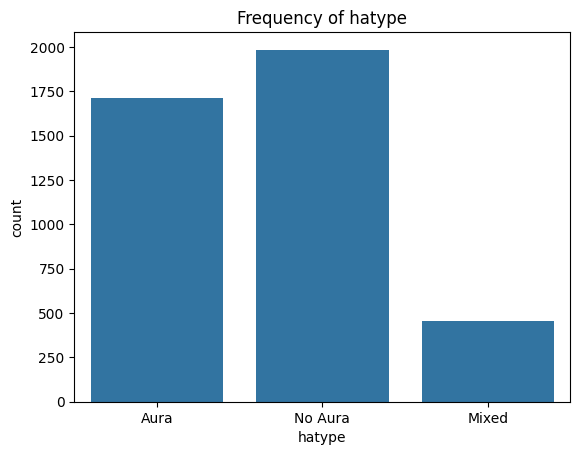

medication
continuing    2386
reduced        981
none           785
Name: count, dtype: int64


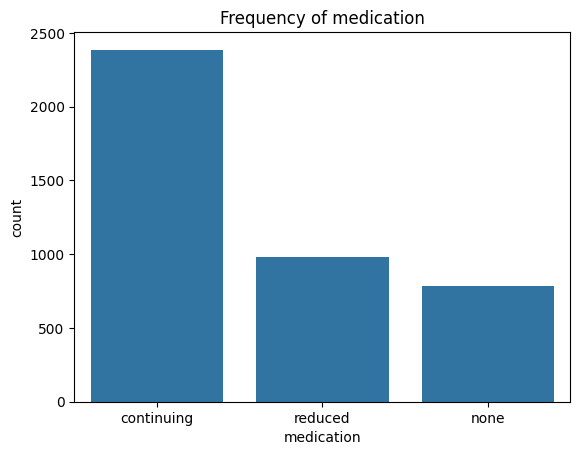

sex
female    3545
male       607
Name: count, dtype: int64


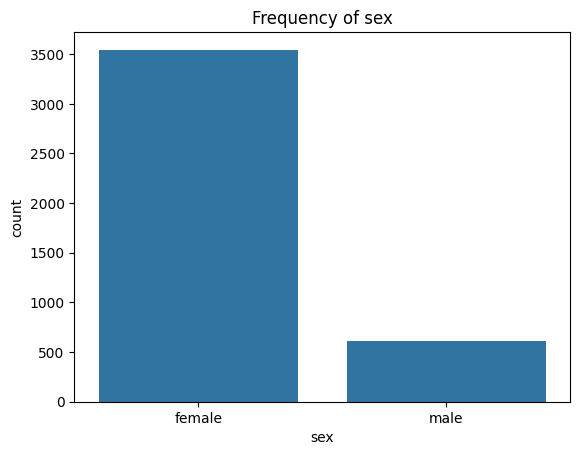

In [34]:
# Frequency counts for categorical variables
cat_cols = ['hatype', 'medication', 'sex']
for col in cat_cols:
    print(data[col].value_counts())
    sns.countplot(x=col, data=data)
    plt.title(f'Frequency of {col}')
    plt.show()

## Bivariate Analysis

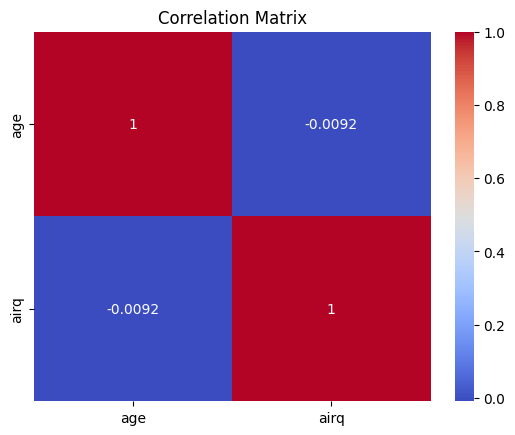

In [35]:
# Correlation matrix for numerical variables
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

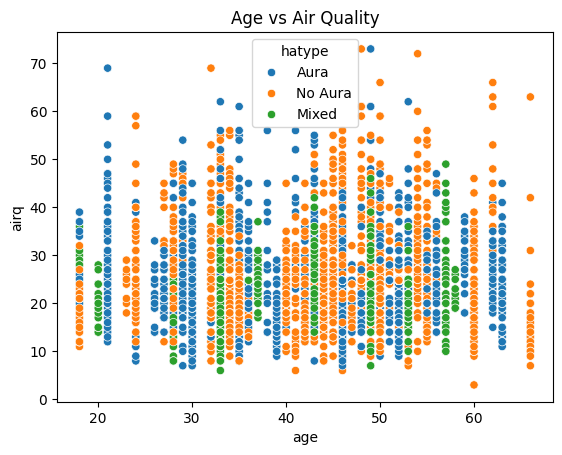

In [36]:
# Scatter plot for numerical vs numerical
sns.scatterplot(x='age', y='airq', hue='hatype', data=data)
plt.title('Age vs Air Quality')
plt.show()

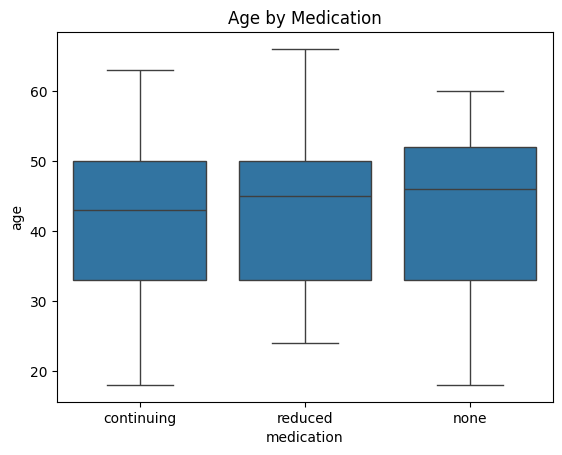

In [37]:
# Boxplot for numerical vs categorical
sns.boxplot(x='medication', y='age', data=data)
plt.title('Age by Medication')
plt.show()

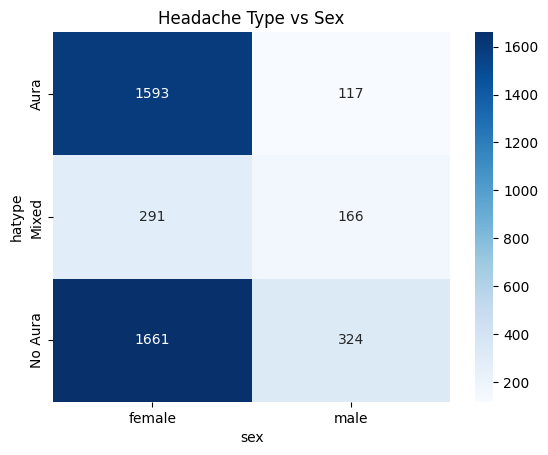

In [38]:
# Heatmap for categorical vs categorical
cross_tab = pd.crosstab(data['hatype'], data['sex'])
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Headache Type vs Sex')
plt.show()

## Multivariate Analysis

In [39]:
# Standardize numerical data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[num_cols])

In [40]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

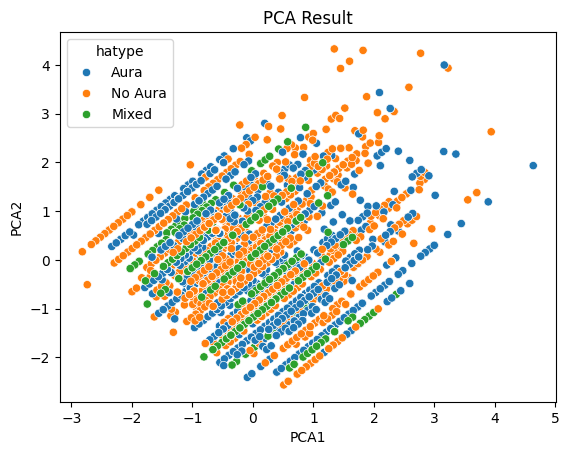

In [41]:
# Scatter plot of PCA results
sns.scatterplot(x='PCA1', y='PCA2', hue='hatype', data=data)
plt.title('PCA Result')
plt.show()